<a href="https://colab.research.google.com/github/dianaquinterol/MujeresDigitales/blob/main/4)_Caso_Practico_SQL_Productos_financieros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Cómo podemos optimizar nuestras ventas de productos financieros?

## Objetivos (2 min)

Al final de este caso, estará familiarizado con las bases de datos. Específicamente, aprenderá las diferencias entre los principales tipos de bases de datos y los diferentes sistemas de administración de bases de datos disponibles. También se introducirán consultas SQL básicas.

También estará expuesto a la jerga técnica de las bases de datos. Si bien es probable que no utilice estos términos a diario, le brindarán una comprensión más integral de la disciplina de la ingeniería de datos y facilitarán las conversaciones entre usted y otros ingenieros de datos.

## Introduccion (5 min)

**Contexto de negocio.** Es analista de datos en una gran empresa de servicios financieros que vende una cartera diversa de productos. Para realizar estas ventas, la firma cuenta con un centro de llamadas donde los agentes de ventas hacen llamadas tanto a los clientes actuales como a los potenciales. A la empresa le gustaría que se sumergiera en sus datos para diseñar estrategias para aumentar sus ingresos o reducir sus costos. Específicamente, les gustaría duplicar sus clientes más confiables y eliminar a los agentes de ventas que no están produciendo resultados.

**Problema de negocio.** La empresa desea responder a las siguientes preguntas: **"¿Qué tipo de clientes son más probable que compren nuestro producto? ¿Y cuáles de mis agentes de ventas son los más/menos productivos?**


**Contexto analitico.** Los datos se dividen en 3 tablas: "Agentes", "Llamadas" y "Clientes", que se encuentran en archivos CSV. Sin embargo, a diferencia de los casos anteriores, primero leeremos estos archivos CSV en una base de datos SQLite creada dentro de Python. Aprenderá en qué se diferencia esta base de datos de los archivos CSV y cómo interactuar con ella utilizando SQL para extraer información útil.

El caso esta estructurado de la siguiente forma (1) aprendera los fundamentos de databases y SQL; (2) usara SQL `SELECT` statements para identificar los clientes potencialmente interesantes; y (4) usara funciones de agregacion de SQL para calcular estadísticas resumidas sobre sus agentes e identificar los más / menos productivos.

## Porque databases? (5 min)

Si bien hemos estado tratando con datos almacenados en archivos CSV hasta ahora, ninguna organización de datos seria ejecuta sus operaciones desde archivos CSV en la computadora de una sola persona. Esta práctica presenta todo tipo de peligros, que incluyen, entre otros:

1. Destrucción de ese único dispositivo
2. Destrucción de los archivos de ese dispositivo
3. Incapacidad para conectarse al dispositivo de esa persona desde otro dispositivo que requiera los datos
4. Incapacidad para almacenar más que una cantidad limitada de datos (ya que un solo dispositivo no tiene tanta memoria)

Por lo tanto, nuestros datos deben almacenarse en otro lugar si queremos acceder a ellos de manera confiable en el futuro y, lo que es más importante, compartirlos y trabajar en ellos con otros. La **base de datos** es la ubicación clásica donde las organizaciones modernas han optado por almacenar sus datos para uso profesional. Las bases de datos han sido un tema de investigación desde finales de la década de 1960. Muchos proveedores de tecnología se dieron cuenta de esto y desarrollaron software de bases de datos para que las empresas lo consumieran. Algunos de estos proveedores y productos son:

1. Microsoft, initially with Microsoft Access and more recently with Microsoft SQL Server
2. Oracle, with their Oracle database and MySQL (a popular open source database)
3. The “PostgreSQL Global Development Group”, with the open-source PostgreSQL

En todas las databases se implementa el lenguage SQL y esto es similar a lo largo de todas las plataformas. Aunque existen algunas diferencias. Comparando ```MySQL``` vs. ```PostgreSQL```, son los dos sistemas mas populares, MySQL no implementa ```FULL JOINS``` (aprenderas sobre los ```JOIN```s mas adelante). PostgreSQL también admite algunas funciones de agregación más avanzadas para estadísticas (las conocerá pronto). Por ejemplo, en PostgreSQL puede realizar regresiones directamente en los datos antes de recuperarlos, mientras que MySQL solo admite operaciones de estadísticas básicas. Sin embargo, esta sobrecarga conduce a un ligero impacto en el rendimiento, lo que hace que MySQL sea más rápido para tareas de recuperación simples.
    
Para los propósitos de este estudio de caso, usaremos PostgreSQL.

## Tipos de databases (15 min)

En este punto, es posible que crea que las bases de datos se pueden considerar como una colección de datos. Esto es cierto, pero desafortunadamente no es tan simple. Los datos no se pueden simplemente arrojar en una base de datos de la misma manera que tiras tus calcetines en el cajón de tus calcetines. Dependiendo de sus necesidades de datos, elegirá entre uno de los dos tipos principales de bases de datos.

### Bases de datos relacionales 

El tipo de base de datos mas comun es la **relational database**, y los sitemas que manejann este tipo de databases se denominan **Relational Database Management Systems (RDBMS)**. Relational databases vienene de los inicios de 1970s y puede ser considerado como el primer tipo de database en crearse. Continuando con el ejemplo de los calcetines, en este caso tendremos slots identicos, cada uno con un par de calcetines. Los socks pueden tener diferentes meterisles, colores , marcas, etc pero necesitan ajustarse en un slot.

Las bases de datos relacionales tratan con "datos relacionales", que es una forma elegante de decir datos "tabulares". Este tipo de conjunto de datos consta de filas y columnas (es decir, tablas) donde cada fila corresponde a una observación y cada columna corresponde a un atributo de esa observación. Entonces, por ejemplo, si volvemos al ejemplo donde estábamos haciendo un seguimiento de nuestros amigos y sus teléfonos, cada fila en el archivo (o tabla) representa a un amigo y cada columna representa la información que queremos rastrear sobre ese amigo ( nombre y número de teléfono). La celda en la intersección de la fila y la columna contiene los datos reales. Los datos relacionales se manipulan utilizando un lenguaje específico llamado **SQL(Lenguaje de consulta estructurado)**, del cual aprenderemos pronto.

Una forma sencilla de conceptualizar una tabla dentro de una base de datos relacional es como un archivo CSV "copiado" a la base de datos. De hecho, muchas bases de datos ofrecen esa posibilidad (suponiendo que su archivo tenga el formato correcto, por supuesto).

### Databases NoSQL
Hace unos 20 años, con la llegada de Internet y la necesidad de almacenar y procesar datos no estructurados (es decir, datos que no encajan bien en el paradigma fila por columna), los desarrolladores comenzaron a discutir otro tipo de base de datos, que finalmente terminó siendo referido como una **base de datos NoSQL**. Estas bases de datos no son relacionales y también están construidas con reglas más "relajadas" en comparación con sus predecesoras. Las bases de datos NoSQL son más como un gran cajón sin ranuras y no exclusivamente para calcetines. Puede optar por usar este cajón principalmente para calcetines de todos los tamaños (pequeños, grandes, tal vez incluso un calcetín suelto por sí solo), pero también podría contener otros artículos como suéteres o pantalones.

Como su nombre lo indica, las bases de datos NoSQL no se basan en SQL, aunque muchas de ellas le permiten utilizar SQL para interactuar con ellas. En esencia, una base de datos NoSQL es simplemente un almacén de valores clave. Es decir, todo lo que almacena (a veces llamado **documento**) en esta base de datos tiene una clave asociada. El trabajo de la base de datos es simplemente ayudarlo a recuperar el documento deseado lo más rápido posible. Nada predetermina lo que contiene un documento (es decir, no tiene un concepto de "tablas"); sin embargo, esta flexibilidad tiene un precio. Cuando recupera un documento, debe realizar comprobaciones adicionales para garantizar su validez, ya que la base de datos no lo hará automáticamente como lo haría con una base de datos relacional. Esto puede ser deseable o no dependiendo de su aplicación particular.

### When to pick one over the other

La eleccion entre RDBMS vs. NoSQL depende exclusivamente de los requerimientos de tu proyecto. Ambos sistemas priorizan partes diferentes del [**CAP Theorem**](https://en.wikipedia.org/wiki/CAP_theorem). En pocas palabras, el teorema de CAP dice que un sistema de base de datos no puede tener los tres siguientes:

- **Consistencia**: cada lectura de la base de datos devolverá la versión de escritura más actualizada o un error
- **Disponibilidad**: cada solicitud recibe una respuesta (sin error), sin la garantía de que contiene la versión de escritura más actualizada
- **Tolerancia de partición**: el sistema continúa funcionando sin importar la calidad de la red entre los nodos

NoSQL prefiere ser tolerante a la partición en lugar de coherente, mientras que RDBMS es lo opuesto. En determinadas aplicaciones, la coherencia es imperativa, lo que a menudo le obliga a utilizar RDBMS. Por ejemplo, si eres un banco y consultas el saldo de un cliente, quieres garantizar que el número que obtienes es el más reciente y no el de ayer.
    
Para el resto del caso, solo consideraremos los sistemas RDBMS.

## Que es un "SQL" ? (8 min)

De modo que hemos ido agregando referencias a SQL en todo momento, pero no hemos explicado qué es. ¡Ahora lo haremos! Al igual que los datos no pueden sobrevivir sin una base de datos, una base de datos no se puede utilizar sin SQL. SQL se utiliza para una amplia variedad de tareas, que incluyen, entre otras, la extracción de datos, la creación de la estructura interna de una base de datos (en forma de tablas) y la lectura y escritura de datos en estas tablas. SQL es un sistema internacional publicado por [ISO](https://www.iso.org/standard/63555.html) por lo que es el lenguaje de facto al que se adhieren todos los sistemas de bases de datos.

En este caso, escribiremos consultas SQL utilizando el [`SQLAlchemy`](https://www.sqlalchemy.org/) un paquete dentro de Python. Esto le permite interactuar directamente con bases de datos relacionales sin salir del entorno de Python, mientras usa una sintaxis idéntica a la que escribiría fuera de Python. Ejecute el siguiente código para configurar este marco:

In [8]:
import pandas as pd
from sqlalchemy import create_engine, text
#Maximo numero de filas a desplegar
pd.options.display.max_rows = 25

engine=create_engine('sqlite://')
df = pd.read_csv('customer.csv').to_sql('customer', engine, if_exists='replace', index=False)
df = pd.read_csv('agent.csv').to_sql('agent', engine, if_exists='replace', index=False)
df = pd.read_csv('call.csv').to_sql('call', engine, if_exists='replace', index=False)

def runQuery(sql):
    result = engine.connect().execute((text(sql)))
    return pd.DataFrame(result.fetchall(), columns=result.keys())



Las columnas en cada una de las tablas se explican a continuacion:

**agent.csv**:
- **AgentID**: the primary key of the table (more on this below)
- **Name**: the name of the agent

**call.csv**:
- **CallID**: the primary key of the table
- **AgentID**: a foreign key (more on this below) to the agents table of the agent who made the call
- **CustomerID**: a foreign key to the customers table of the customer who is being called
- **PickedUp**: a Boolean that is 1 if the customer picked up and 0 if they did not
- **Duration**: integer of the duration of the call
- **ProductSold**: a Boolean that is 1 if the agent made a sale and 0 if they did not

**customer.csv**:
- **CustomerID**: the primary key of the table
- **Name**: the name of the customer
- **Occupation**: the occupation of the customer. 'Unemployed' if no occupation
- **Email**: the email of the customer
- **Company**: the company that the customer works for
- **PhoneNumber**: the phone number of the customer
- **Age**: the age of the customer


La estructura de la base de datos anterior se puede visualizar como se muestra a continuación. Esto se llama **Diagrama de relación de entidades (ER)**, que denota las tablas presentes en la base de datos, las columnas en las tablas y las relaciones entre las tablas:
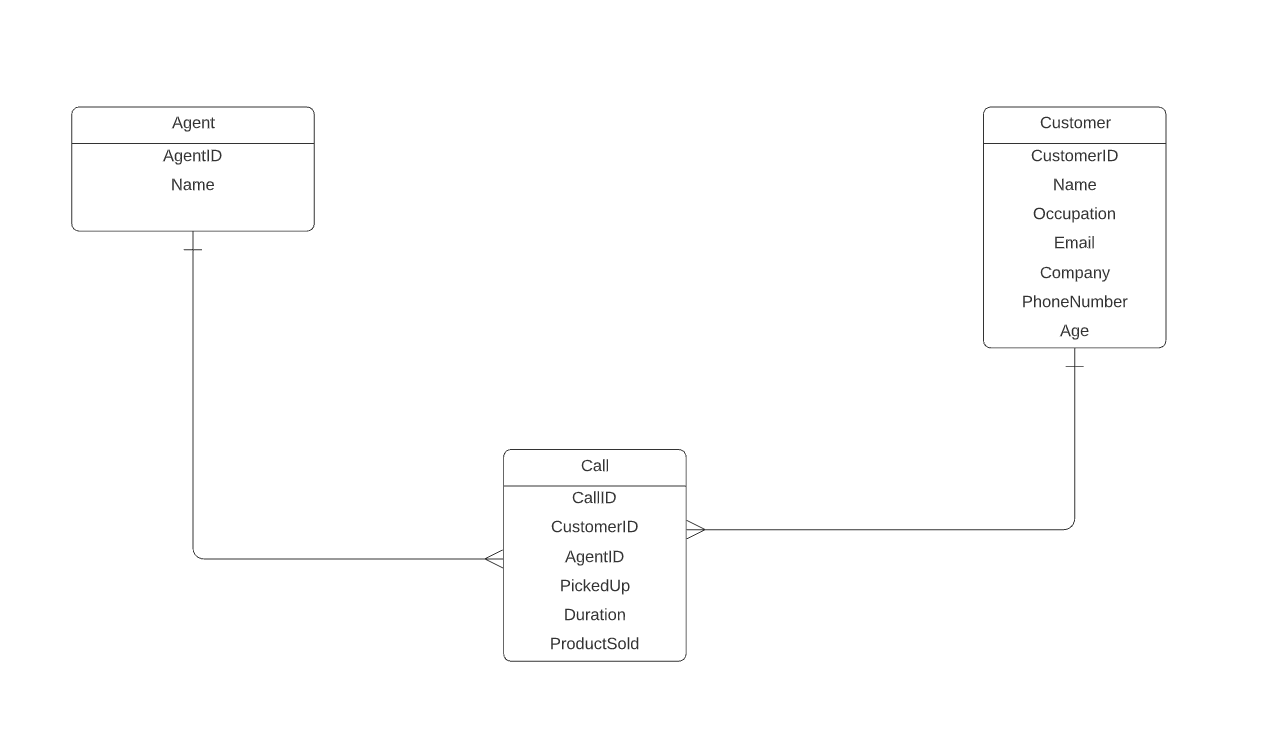

El diagrama anterior ofrece una buena descripción general de cómo está estructurado el esquema y cómo se interconectan los datos.

## Encontrar los clientes potenciales de interes (20 min)

Lo más importante que hará en SQL es extraer un subconjunto de los datos de una tabla SQL según un conjunto de reglas. Esto se logra usando la declaración **`SELECT`** y la siguiente sintaxis:

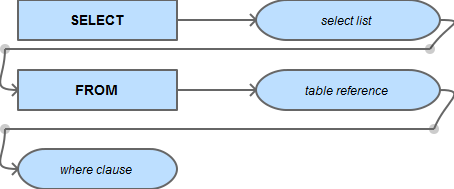

Traduzcamos esta imagen en palabras:

1. Inicia con la palabra `SELECT`
2. Coloca los nombres de las columnas que seleccionaras, separadas por comas(de forma alternativa, puedes usar el simbolo `*`)
3. continua con la palabra `FROM`
4. Termina con el nombre de la tabla que deseas seleccionar
5. Opcionalmente, puedes usar el `WHERE` para obtener resultados que solo satisfagan ciertas condiciones (similar a como se escribe en python `if...then`)

Dado que la empresa quiere profundizar en sus clientes, comencemos por extraer algunos de sus datos de nuestros archivos; es decir, información sobre clientes que no están desempleados (y por lo tanto es más probable que nos compren).

### Desafio 1: (5 min)

Escriba una consulta que seleccione el ID y el nombre del cliente de la tabla `Customer`, mostrando solo los resultados de los clientes que no están desempleados. Recuerde escribir su consulta como una cadena de varias líneas (encerrada entre un par de comillas triples `"""`) y pasarla a la función `runQuery()`definida en el marco anterior para verificar su trabajo.

**Respuesta**. 

```SQL
SELECT CustomerID, Name
FROM Customer
WHERE Occupation != 'Unemployed'
```

In [13]:
query ="SELECT * FROM Customer;"
runQuery(query)

,CustomerID,Name,Occupation,Email,Company,PhoneNumber,Age
0,0,David Melton,Unemployed,DMelton@zoho.com,"Morris, Winters and Ramirez",409-093-0748,16
1,1,Michael Gonzalez,Student,Gonzalez_Michael@yahoo.com,Hernandez and Sons,231-845-0673,19
2,2,Amanda Wilson,Student,Amanda.Wilson75@verizon.com,"Mooney, West and Hansen",844-276-4552,18
3,3,Robert Thomas,"Engineer, structural",RThomas@xfinity.com,Johnson-Gordon,410-404-8000,25
4,4,Eddie Hall,Surgeon,EddieHall@outlook.com,Dawson LLC,872-287-2196,30
...,...,...,...,...,...,...,...
995,995,Ashley Young,Student,Ashley_Y@xfinity.com,Esparza-Johnson,751-654-6719,19
996,996,Mr. Steven Smith,"Engineer, structural",Mr..Smith@zoho.com,Hensley-Odom,279-898-4565,26
997,997,Mark Smith,"Engineer, control and instrumentation",Mark_S@yahoo.com,Fisher LLC,563-382-1868,29
998,998,Jeffrey Carrillo,Unemployed,JeffreyCarrillo@yahoo.com,Morgan LLC,223-784-2416,15


In [16]:
query01 = "SELECT Name, Email,PhoneNumber FROM Customer;"
runQuery(query01)

,Name,Email,PhoneNumber
0,David Melton,DMelton@zoho.com,409-093-0748
1,Michael Gonzalez,Gonzalez_Michael@yahoo.com,231-845-0673
2,Amanda Wilson,Amanda.Wilson75@verizon.com,844-276-4552
3,Robert Thomas,RThomas@xfinity.com,410-404-8000
4,Eddie Hall,EddieHall@outlook.com,872-287-2196
...,...,...,...
995,Ashley Young,Ashley_Y@xfinity.com,751-654-6719
996,Mr. Steven Smith,Mr..Smith@zoho.com,279-898-4565
997,Mark Smith,Mark_S@yahoo.com,563-382-1868
998,Jeffrey Carrillo,JeffreyCarrillo@yahoo.com,223-784-2416


In [20]:
query02 = """SELECT Name, Email, Age FROM Customer
WHERE Age >= 18"""
runQuery(query02)

,Name,Email,Age
0,Michael Gonzalez,Gonzalez_Michael@yahoo.com,19
1,Amanda Wilson,Amanda.Wilson75@verizon.com,18
2,Robert Thomas,RThomas@xfinity.com,25
3,Eddie Hall,EddieHall@outlook.com,30
4,Maria Johnson,MJohnson@aol.com,22
...,...,...,...
755,Ruben Steele,Ruben.Steele@att.com,30
756,Ashley Young,Ashley_Y@xfinity.com,19
757,Mr. Steven Smith,Mr..Smith@zoho.com,26
758,Mark Smith,Mark_S@yahoo.com,29


In [21]:
query03 = """ SELECT Name, Email, Age FROM Customer
WHERE Age >= 18 AND Age <=30;"""
runQuery(query03)

,Name,Email,Age
0,Michael Gonzalez,Gonzalez_Michael@yahoo.com,19
1,Amanda Wilson,Amanda.Wilson75@verizon.com,18
2,Robert Thomas,RThomas@xfinity.com,25
3,Eddie Hall,EddieHall@outlook.com,30
4,Maria Johnson,MJohnson@aol.com,22
...,...,...,...
481,Ruben Steele,Ruben.Steele@att.com,30
482,Ashley Young,Ashley_Y@xfinity.com,19
483,Mr. Steven Smith,Mr..Smith@zoho.com,26
484,Mark Smith,Mark_S@yahoo.com,29


In [14]:
query10 = "SELECT * FROM agent;"
runQuery(query10)


,AgentID,Name
0,0,Michele Williams
1,1,Jocelyn Parker
2,2,Christopher Moreno
3,3,Todd Morrow
4,4,Randy Moore
5,5,Paul Nunez
6,6,Gloria Singh
7,7,Angel Briggs
8,8,Lisa Cordova
9,9,Dana Hardy


In [15]:
query15 = "SELECT * FROM call;"
runQuery(query15)

,CallID,AgentID,CustomerID,PickedUp,Duration,ProductSold
0,0,10,179,0,0,0
1,1,5,691,1,116,0
2,2,10,80,1,165,0
3,3,6,629,1,128,0
4,4,8,318,1,205,0
...,...,...,...,...,...,...
9935,9995,6,92,1,103,0
9936,9996,0,731,1,188,0
9937,9997,4,53,1,152,0
9938,9998,5,260,0,0,0


In [7]:
query1 = """SELECT CustomerID, Name ,Occupation
FROM Customer
WHERE Occupation != 'Unemployed'"""
runQuery(query1)

,CustomerID,Name,Occupation
0,1,Michael Gonzalez,Student
1,2,Amanda Wilson,Student
2,3,Robert Thomas,"Engineer, structural"
3,4,Eddie Hall,Surgeon
4,6,Maria Johnson,"Engineer, aeronautical"
...,...,...,...
755,994,Ruben Steele,Orthoptist
756,995,Ashley Young,Student
757,996,Mr. Steven Smith,"Engineer, structural"
758,997,Mark Smith,"Engineer, control and instrumentation"


Por supuesto, para los nombres, es sensato intentar enumerarlos en orden alfabético. SQL nos permite hacer esto con bastante facilidad con la instrucción `ORDER BY`. A continuación, le sigue una lista de columnas separadas por comas en las que desea ordenar sus resultados (las columnas que aparecen primero tienen prioridad en el orden posterior). Opcionalmente, puede agregar la palabra clave `ASC` o` DESC` (abreviatura de ascendente y descendente, respectivamente) después de cada columna para determinar el tipo de orden (por ejemplo, alfabético o alfabético inverso para una columna de cadena).

También podemos usar la declaración `AS` para cambiar el nombre de una columna devuelta por su consulta. Sin embargo, este cambio es solo temporal y solo es válido para esa consulta en particular. Por ejemplo, podemos cambiar el nombre de la columna `Name` a` CustomerName` y ordenarla alfabéticamente. Esta operación se conoce como **aliasing**:


```SQL
SELECT CustomerID, Name AS CustomerName
FROM Customer
WHERE Occupation != 'Unemployed'
ORDER BY CustomerName
```

In [5]:
query2 = """SELECT CustomerID, Name AS CustomerName 
FROM Customer 
WHERE Occupation != 'Unemployed' 
ORDER BY CustomerName ASC
"""
runQuery(query2)

,CustomerID,CustomerName
0,900,Aaron Gutierrez
1,622,Aaron Rose
2,226,Adam Ward
3,786,Alan Chambers
4,985,Alan Mitchell
...,...,...
755,699,Willie Greene
756,715,Yesenia Wright
757,952,Yolanda White
758,421,Zachary Ruiz


In [28]:
query04 = """SELECT Name, Occupation, Age
FROM Customer
WHERE Age >= 18 AND Age <=30
ORDER BY Age ASC"""
runQuery(query04)

,Name,Occupation,Age
0,Amanda Wilson,Student,18
1,Christopher Bishop,Student,18
2,Jonathan Meadows,Student,18
3,John Weiss,Student,18
4,Pamela Atkins,Student,18
...,...,...,...
481,Ian Edwards,Solicitor,30
482,Kristen Hinton,Tour manager,30
483,Stephanie Burns,"Librarian, public",30
484,Michael Johnson,"Engineer, electrical",30


Este es un gran primer paso; sin embargo, mientras elabora la lista de clientes que no están desempleados, inevitablemente pasa mucho tiempo mirando las diferentes profesiones que tienen sus clientes y se da cuenta de la frecuencia con la que aparecen ingenieros en su base de datos. Usted sabe que los trabajos de ingeniería tienden a exigir salarios más altos en estos días, por lo que decide intentar extraer una lista de todos los tipos únicos de trabajos de ingeniería que están representados en su base de datos. Para asegurarse de que no obtenga títulos de trabajo duplicados en los resultados de su consulta, deberá escribir la palabra clave `DISTINCT` inmediatamente después de` SELECT` en su consulta.

### Desafio 2: (5 min)
Escriba una consulta que produzca una lista, en orden alfabético, de todas las distintas ocupaciones en la tabla `Customer` que contengan la palabra" Ingeniero ".

**Sugerencia:** El operador `LIKE` se puede utilizar cuando desee buscar valores similares. Se incluye como parte de una cláusula `WHERE`. Debe complementarse con el símbolo "%", que es un comodín que representa cero, uno o varios caracteres. Por ejemplo, una cláusula `WHERE` válida que utiliza el operador` LIKE` es `WHERE Name LIKE 'Matt%'`, que devolvería cualquier resultado donde el nombre de la persona comience con la palabra "Matt"; p.ej. "Matt" o "Matteo" o "Matthew", etc.

**Respuesta.**

```SQL
SELECT DISTINCT Occupation
FROM Customer
WHERE Occupation LIKE '%Engineer%'
ORDER BY Occupation
```

In [40]:
query3 = """SELECT DISTINCT Occupation
FROM Customer
WHERE Occupation LIKE '%Engin%'
ORDER BY Occupation DESC"""
runQuery(query3)

,Occupation
0,"Engineer, water"
1,"Engineer, technical sales"
2,"Engineer, structural"
3,"Engineer, site"
4,"Engineer, production"
...,...
24,"Engineer, automotive"
25,"Engineer, agricultural"
26,"Engineer, aeronautical"
27,Electrical engineer


In [48]:
query05 = """SELECT Name, Occupation, Email
FROM Customer
WHERE Email LIKE '%aol%'
"""
runQuery(query05)

,Name,Occupation,Email
0,Maria Johnson,"Engineer, aeronautical",MJohnson@aol.com
1,Michelle Reyes,"Engineer, drilling",Michelle.Reyes@aol.com
2,Lauren Hill,Counsellor,Hill_Lauren73@aol.com
3,Gary Avila,"Engineer, civil (contracting)",Gary.Avila@aol.com
4,Richard Tran,Architect,Richard.Tran@aol.com
...,...,...,...
67,Christopher Jackson Jr.,"Engineer, civil (consulting)",CJr.@aol.com
68,Misty Johnson,Student,Johnson.Misty@aol.com
69,Patrick Berger,Unemployed,Berger_Patrick@aol.com
70,Tracy Perez,Unemployed,Perez_Tracy@aol.com


In [50]:
query06 = """SELECT DISTINCT Occupation
FROM Customer
WHERE Age == 25
ORDER BY Occupation DESC
"""
runQuery(query06)

,Occupation
0,Tour manager
1,Risk analyst
2,Psychiatrist
3,Police officer
4,Orthoptist
...,...
28,Banker
29,Airline pilot
30,Administrator
31,Actuary


Ahora, uno de sus colegas de marketing le dice que las personas que tienen 30 años o más tendrán una mayor probabilidad de comprar su producto (presumiblemente porque en ese momento tienen más ingresos y ahorros disponibles). No quiere dar por sentada la palabra de su colega, por lo que decide no ignorar por completo a las personas menores de 30 años y, en su lugar, agrega esa información al informe sobre la edad de la persona, para que el agente que realice la llamada posterior pueda decidir cómo quiere. para usar esa información. Sin embargo, debido a problemas de privacidad, tampoco puede compartir la edad exacta de la persona.

### Desafio 3: (5 min)
Escriba una consulta que devuelva el ID del cliente, su nombre y una columna `Over30` que contenga" Sí "si el cliente tiene más de 30 años y" No "si no.

**Sugerencia:** Deberá utilizar la cláusula `CASE-END`. La cláusula `CASE-END` se puede utilizar para evaluar declaraciones condicionales y devuelve un valor una vez que se cumple una condición (similar a una cláusula if-then-else en Python). Si no se cumple ninguna condición, devuelve el valor de la cláusula ELSE (o NULL si no hay una declaración ELSE). Por ejemplo:

```SQL
CASE
    WHEN Name = "Matt" THEN 'Yes'
    WHEN Name = "Matteo" THEN 'Maybe'
    ELSE 'No'
END
```

**Respuesta.** 

```SQL
SELECT CustomerID, Name,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30
FROM Customer
ORDER BY Name DESC
```

In [7]:
query4 = """SELECT CustomerID, Name,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30
FROM Customer
ORDER BY Name DESC"""
runQuery(query4)

,CustomerID,Name,Over30
0,392,Zachary Wilson,Yes
1,986,Zachary Stevenson,No
2,421,Zachary Ruiz,Yes
3,18,Zachary Howe,No
4,883,Zachary Anderson,No
...,...,...,...
995,65,Adam Jimenez,No
996,622,Aaron Rose,No
997,145,Aaron Mcintyre,No
998,461,Aaron Hendrix,No


In [63]:
query07 = """SELECT Name, Occupation,
  CASE
    WHEN Occupation == 'Student' THEN 'Yes'
    WHEN Occupation != 'Student' THEN 'No'
    ELSE 'Missing Data'
  END AS Es_Estudiante
FROM Customer
"""
runQuery(query07)

,Name,Occupation,Es_Estudiante
0,David Melton,Unemployed,No
1,Michael Gonzalez,Student,Yes
2,Amanda Wilson,Student,Yes
3,Robert Thomas,"Engineer, structural",No
4,Eddie Hall,Surgeon,No
...,...,...,...
995,Ashley Young,Student,Yes
996,Mr. Steven Smith,"Engineer, structural",No
997,Mark Smith,"Engineer, control and instrumentation",No
998,Jeffrey Carrillo,Unemployed,No


In [67]:
query08 = """SELECT CustomerID, Name, Occupation, Email,
  CASE
    WHEN Email LIKE '%yahoo%' THEN 'Yes'
    WHEN Email != 'yahoo' THEN 'No'
    ELSE 'Missing Data'
  END AS Es_yahoo
FROM Customer
"""
runQuery(query08)

,CustomerID,Name,Occupation,Email,Es_yahoo
0,0,David Melton,Unemployed,DMelton@zoho.com,No
1,1,Michael Gonzalez,Student,Gonzalez_Michael@yahoo.com,Yes
2,2,Amanda Wilson,Student,Amanda.Wilson75@verizon.com,No
3,3,Robert Thomas,"Engineer, structural",RThomas@xfinity.com,No
4,4,Eddie Hall,Surgeon,EddieHall@outlook.com,No
...,...,...,...,...,...
995,995,Ashley Young,Student,Ashley_Y@xfinity.com,No
996,996,Mr. Steven Smith,"Engineer, structural",Mr..Smith@zoho.com,No
997,997,Mark Smith,"Engineer, control and instrumentation",Mark_S@yahoo.com,Yes
998,998,Jeffrey Carrillo,Unemployed,JeffreyCarrillo@yahoo.com,Yes


Modifiquemos ahora el ejercicio 3 para que la consulta solo devuelva clientes que trabajan en una profesión de ingeniería:

```SQL
SELECT CustomerID, Name,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30
FROM Customer
WHERE Occupation LIKE '%Engineer%'
ORDER BY Name DESC
```

In [8]:
query5 = """SELECT CustomerID, Name,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30
FROM Customer
WHERE Occupation LIKE '%Engineer%'
ORDER BY Name DESC"""
runQuery(query5)

,CustomerID,Name,Over30
0,421,Zachary Ruiz,Yes
1,952,Yolanda White,No
2,699,Willie Greene,Yes
3,973,William Jackson,Yes
4,966,William Garcia,No
...,...,...,...
356,918,Alison Vaughan,Yes
357,568,Alice Lee,No
358,432,Alexis Riddle,No
359,985,Alan Mitchell,Yes


## Investigar las tasas de conversión de los clientes (20 min)

Para validar si nuestras hipótesis sobre los ingenieros y la edad son ciertas (por ejemplo, los ingenieros exhiben tasas de conversión de ventas de productos más altas, y quizás los ingenieros mayores de 30 tienden a exhibir una tasa de conversión aún más alta), necesitaremos usar dos tablas: `Call` y `Customer`. Esto se debe a que la columna `ProductSold` se encuentra solo en la tabla` Call`, sin embargo, la información sobre las profesiones y la edad del cliente solo se encuentra en la tabla `Customer`.

Los comandos `SELECT` no están restringidos a una sola tabla. De hecho, en teoría, no hay límite en la cantidad de tablas de las que puede extraer datos en una sola consulta SQL. Introduzcamos algunos conceptos nuevos que son relevantes una vez que vayamos más allá de una sola tabla.


**Primary and foreign keys** son conceptos muy importantes que deben ser entendidos por cualquier profesional de bases de datos. Claves primarias:

1. Identificadores unicos en una tabla par aun registro. Usualemente tienen la palabra "ID"
    * Por ejemplo, `CustomerID` es la primary key de la tabla `Customer`, `AgentID` es la llave primaria de la tabla `Agent`, y `CallID` es la llave primaria de la tabla `Call`     
2. No acepta valores nulos. Y no deberian ser nulos porque son los identificadores
3. Son limitados a uno por tabla

Por el otro lado, foreign keys:

1. Son un campo de la tabla que es la clave principal de otra tabla.
2. Puede aceptar valores nulos
3. No son limitados de ninguna manera por tabla
    * Por ejemplo, la tabla `Call` tiene 2 foreign keys: `AgentID` y `CustomerID` que vienen de las tablas `Agent` y `Customer`, respectivamente

### Extracción de datos de llamadas para clientes que trabajan en profesiones de ingeniería (12 min)

Primero extraigamos los datos relevantes para que podamos realizar este análisis. Aquí, una cláusula **`JOIN`** será útil.

Las cláusulas `JOIN` se utilizan para combinar datos de dos o más tablas en la misma consulta. Por ejemplo, en el escenario actual, necesitamos obtener el nombre del agente involucrado en una llamada. La tabla `Call` contiene solo el `AgentID` y no el nombre del agente. `JOIN` se vuelve útil aquí para que podamos hacer coincidir la tabla` Call` con la tabla `Agent`, que contiene la información del nombre.

Aquí hay un diagrama que muestra cómo funciona `JOIN` (específicamente, **`INNER JOIN`**, que es la versión predeterminada y la única de la que tendrá que preocuparse en este caso). Observe que solo las filas con `id` de 1 y 4 se extraen porque esos son los únicos dos` id` que aparecen en ambas tablas:

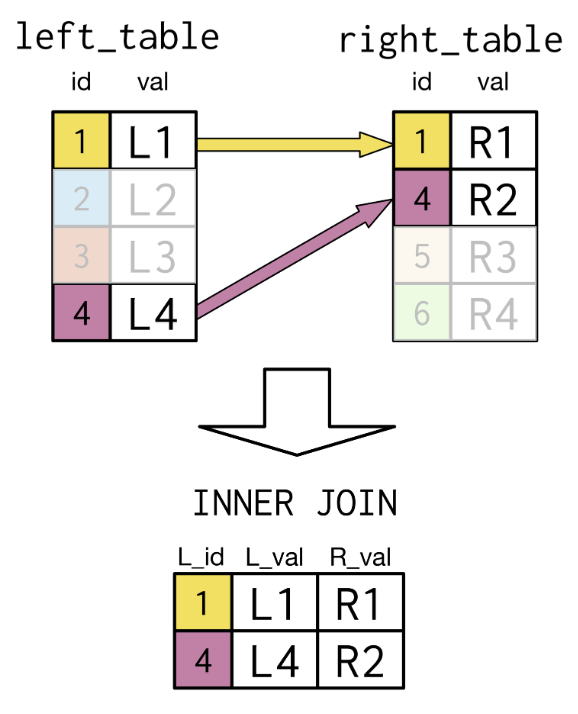

Una clausula `JOIN` consiste en dos partes:

1. La instrucción base `JOIN`, que tiene el formato`[Tabla 1] JOIN [Tabla 2]`. Esto realiza un producto cartesiano en las 2 tablas que se unen. Por ejemplo, si tenemos la Tabla A con 5 filas y la Tabla 5 con 3 filas, su producto cartesiano devolverá 15 filas (5 x 3)
2. Un criterio `JOIN`, que filtra los resultados del producto cartesiano, comenzando con la palabra clave `ON`

A continuación, se muestra un ejemplo de un criterio `JOIN` en acción, que nos indica que solo demos combinaciones de filas en las que el ID del agente coincida en ambas tablas:

```SQL
SELECT CallID, A.AgentID, name
FROM Call C
JOIN Agent A ON C.AgentID = A.AgentID
ORDER BY Name DESC
```

In [9]:
query6 = """SELECT CallID, A.AgentID, name
FROM Call AS C
JOIN Agent AS A ON C.AgentID = A.AgentID
ORDER BY Name DESC"""
runQuery(query6)

,CallID,AgentID,Name
0,12,3,Todd Morrow
1,28,3,Todd Morrow
2,32,3,Todd Morrow
3,50,3,Todd Morrow
4,60,3,Todd Morrow
...,...,...,...
9934,9985,10,Agent X
9935,9986,10,Agent X
9936,9991,10,Agent X
9937,9992,10,Agent X


Note que:

1. `C` y` A` son alias de las tablas `Call` y` Agent` para evitar tener que escribir el nombre de la tabla cada vez. A diferencia del alias de columna anterior, no necesitamos la palabra clave `AS` aquí
2. Escribimos `A.AgentID` en lugar de` AgentID` en la instrucción SELECT; esto se debe a que la columna `AgentID` existe en ambas tablas, por lo que tenemos que decirle a la base de datos de cuál obtener el resultado


### Desafio 4: (7 min)

Escriba una consulta que devuelva todas las llamadas realizadas a clientes de la profesión de ingeniería y muestre si son mayores o menores de 30, así como si terminaron comprando el producto de esa llamada.

**Respuesta.** 

```SQL
SELECT CallID, Cu.CustomerID, Name, ProductSold,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Occupation LIKE '%Engineer%'
ORDER BY Name DESC
```

In [16]:
query7 = """SELECT CallID, Cu.CustomerID, Name, ProductSold,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE (Occupation LIKE '%Engineer%') AND (ProductSold >0)
ORDER BY Name DESC"""
runQuery(query7)

,CallID,CustomerID,Name,ProductSold,Over30
0,3386,421,Zachary Ruiz,1,Yes
1,4234,952,Yolanda White,1,No
2,6780,952,Yolanda White,1,No
3,8124,952,Yolanda White,1,No
4,9136,952,Yolanda White,1,No
...,...,...,...,...,...
755,4205,985,Alan Mitchell,1,Yes
756,4980,622,Aaron Rose,1,No
757,5718,622,Aaron Rose,1,No
758,6444,622,Aaron Rose,1,No


In [23]:
query7 = """SELECT CallID, Cu.CustomerID, Name, ProductSold,
    CASE
        WHEN Age >= 30 THEN 'Yes'
        WHEN Age <  30 THEN 'No'
        ELSE 'Missing Data'
    END AS Over30,
    CASE
        WHEN email LIKE '%yahoo%' THEN 'Yes'
        WHEN email NOT LIKE '%yahoo%' THEN 'no'
        ELSE 'Missing Data'
    END AS Es_yahoo    
FROM Customer Cu
JOIN Call ca ON Ca.CustomerID = Cu.CustomerID
WHERE duration >=30
ORDER BY duration DESC"""
runQuery(query7)

,CallID,CustomerID,Name,ProductSold,Over30,Es_yahoo
0,1133,582,Steven Mayo,0,No,no
1,4064,540,Vincent Key,0,No,Yes
2,4046,568,Alice Lee,0,No,no
3,8482,796,Steven Jones,1,Yes,no
4,3151,826,Grant Alvarez,1,No,no
...,...,...,...,...,...,...
6899,4790,293,Herbert Hall,0,No,no
6900,7021,200,Mrs. Diane Johnson DDS,0,No,no
6901,8750,172,Shari Barnett,1,No,no
6902,1954,913,Andrea Lamb,0,No,no


## Analizar los datos de conversión de llamadas (15 min)

Ahora, queremos determinar si los clientes de nuestra cohorte deseada exhiben una tasa de conversión de ventas más alta en comparación con la población general de clientes. Una forma razonable de hacer esto es contar el número total de llamadas a esta cohorte que resultaron en una venta y dividir eso por el número total de llamadas a esta cohorte (ya sea que resulten en una venta o no) para obtener un porcentaje, y luego compararlo con el porcentaje que calculamos de la tabla de `calls` en general.

Sin embargo, para calcular estas cifras, necesitaremos aprender un poco sobre **funciones de agregación**. Una función de agregación le permite realizar un cálculo en un conjunto de valores para devolver un solo valor, esencialmente calculando algún tipo de estadística de resumen.

Las consultas de agregación suelen tener este aspecto:

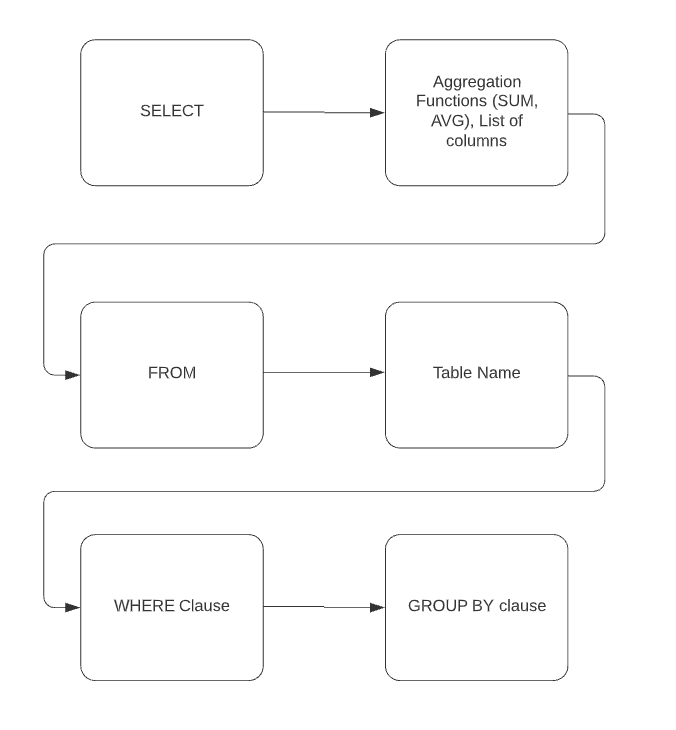

Las siguientes son las funciones agregadas de SQL más utilizadas:

1. `AVG()` – calculates the average of a set of values
2. `COUNT()` – counts rows in a specified table or view
3. `MIN()` – gets the minimum value in a set of values
4. `MAX()` – gets the maximum value in a set of values
5. `SUM()` – calculates the sum of values

Como se menciono anteriormente, PostgreSQL tiene funciones mas avanzadas [aggregate functions](https://www.postgresql.org/docs/9.5/functions-aggregate.html). Especificamente tiene algunas funciones estadisticas sofisticadas. Por ejemplo,

1. `regr_intercept(Y, X)` - Returns the intercept for the line of best fit
2. `regr_slope(Y, X)` - Returns the slope of the line of best fit
3. `corr(Y, X)` - Returns the correlation between two columns

Por lo tanto, las regresiones en grandes conjuntos de datos y la conexión de red es lenta, puede realizar las regresiones en la propia consulta.

### Desafio 5: (5 min)

Escriba dos consultas: una que calcule las ventas totales y las llamadas totales realizadas a los clientes de la profesión de ingeniería y otra que calcule las mismas métricas para toda la base de clientes. ¿Qué puede concluir con respecto a la tasa de conversión entre los clientes de ingeniería frente a la base de clientes en general?

**Respuesta.**

```SQL
SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Occupation LIKE '%Engineer%'
```

In [25]:
query8 = """SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Occupation LIKE '%Engineer%'"""
runQuery(query8)

,TotalSales,NCalls
0,760,3619


In [ ]:
760/3619

0.21000276319425257

```SQL
SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
```

In [27]:
query9 = """SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID"""
runQuery(query9)

,TotalSales,NCalls
0,2084,9925


In [28]:
2084/9925

0.20997481108312344

La tasa de conversión para ambos grupos es ~20.9%, lo que indica que los ingenieros no tienen más probabilidades de comprar nuestros productos que la población en general.

### Desafio 6: (3 min)

Escriba una consulta que calcule las ventas totales y las llamadas totales realizadas a clientes mayores de 30 años. ¿Existe una diferencia notable entre la tasa de conversión aquí y la de la base de clientes en general?

**Respuesta.**

```SQL
SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Age >= 30
```

In [ ]:
query10 = """SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Age >= 30"""
runQuery(query10)

,TotalSales,NCalls
0,659,3096


In [ ]:
659/3096

0.21285529715762275

La tasa de conversión es ~211% frente a la general ~20.9%. Puede haber alguna diferencia, pero es bastante pequeña, por lo que necesitaríamos ejecutar pruebas de significación estadística para validar esto. (Aprenderá sobre estos en casos futuros).

### Desafio 7: (3 min)

¿Qué tal si observa la tasa de conversión de ventas para ingenieros mayores de 30 años?

```SQL
SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Occupation LIKE '%Engineer%' AND Age >= 30
```

**Respuesta.**

In [30]:
query11 = """SELECT SUM(ProductSold) AS TotalSales, COUNT(*) AS NCalls
FROM Customer Cu
JOIN Call Ca ON Ca.CustomerID = Cu.CustomerID
WHERE Occupation LIKE '%Engineer%' AND Age >= 30"""
runQuery(query11)

,TotalSales,NCalls
0,376,1816


Aquí, en realidad observamos el patrón opuesto: la tasa de conversión es solo ~ 20.5%.

A partir de estos números, podemos concluir que el estado de un cliente como profesional de la ingeniería no tiene un efecto positivo en su tasa de conversión. Por otro lado, tener una edad de al menos 30 años PUEDE tener algún efecto; sin embargo, necesitaríamos hacer pruebas estadísticas más profundas para determinar esto.

## Evaluando el performance de los agentes 

Recuerde la segunda parte de nuestra pregunta comercial: debemos averiguar cuáles de nuestros agentes son los más y los menos productivos. Para hacer esto, tiene sentido determinar qué métricas podrían estar relacionadas con la productividad. Al observar las características presentes, las siguientes parecen ser razonables:

1. La cantidad de llamadas que hizo un agente.
2. La duración de las llamadas que hizo un agente
3. El número total de productos que vendió un agente.

### Pregunta: (5 min)

Para cualquier agente, ¿extraer esta información sería una buena forma de analizar rápidamente su productividad? ¿Por qué o por qué no?

Si bien las métricas anteriores son útiles, algunas de ellas son demasiado numerosas para analizarlas fácilmente. Específicamente, la duración de las llamadas que hizo un agente es un conjunto de datos que es tan grande como la cantidad de llamadas que hizo el agente. Si el agente hizo muchas llamadas, no tendrá sentido lanzarnos a nosotros mismos todo el conjunto de llamadas. En cambio, deberíamos calcular algunas estadísticas resumidas de esta métrica; es decir, las longitudes mínima, máxima y media parecen razonables.

### Desafio 8: (5 min)

Escriba una consulta que devuelva, para cada agente, el nombre del agente, la cantidad de llamadas, las llamadas más largas y más cortas, la duración promedio de las llamadas y la cantidad total de productos vendidos. Nombra las columnas `AgentName`, `NCalls`, `Shortest`, `Longest`, `AvgDuration` y `TotalSales` y ordena la tabla por `AgentName` en orden alfabético. (Asegúrese de incluir la cláusula `WHERE PickedUp = 1` para calcular solo el promedio de todas las llamadas que fueron atendidas (de lo contrario, ¡todas las duraciones mínimas serán 0)!)

**Respuesta.**

```SQL
SELECT Name AS AgentName, COUNT(*) AS NCalls, MIN(Duration) AS Shortest, MAX(Duration) AS Longest, AVG(Duration) AS AvgDuration, SUM(ProductSold) AS TotalSales
FROM Calls C
    JOIN Agent A ON C.AgentID = A.AgentID
WHERE PickeDup = 1
GROUP BY Name
ORDER BY Name
```

In [31]:
query12 = """SELECT Name AS AgentName, COUNT(*) AS NCalls, MIN(Duration) AS Shortest, MAX(Duration) AS Longest, AVG(Duration) AS AvgDuration, SUM(ProductSold) AS TotalSales
FROM Call C
    JOIN Agent A ON C.AgentID = A.AgentID
WHERE PickeDup = 1
GROUP BY Name
ORDER BY TotalSales DESC"""

df=runQuery(query12)
df['Tasa']=(df.TotalSales/df.NCalls)*100
df

,AgentName,NCalls,Shortest,Longest,AvgDuration,TotalSales,Tasa
0,Gloria Singh,662,36,349,182.175227,209,31.570997
1,Todd Morrow,631,-3,339,180.711569,204,32.329635
2,Lisa Cordova,639,46,344,179.214397,201,31.455399
3,Michele Williams,685,22,306,177.880292,198,28.905109
4,Agent X,640,22,334,180.975000,194,30.312500
5,Paul Nunez,648,-5,323,181.070988,194,29.938272
6,Christopher Moreno,649,47,363,177.979969,189,29.121726
7,Jocelyn Parker,621,40,336,180.326892,184,29.629630
8,Dana Hardy,554,49,356,177.203971,182,32.851986
9,Randy Moore,600,16,326,178.595000,177,29.500000


### Pregunta: (5 min)

A lo largo de este caso, hemos definido la tasa de conversión de ventas como la cantidad de productos vendidos dividida por la cantidad de llamadas realizadas. ¿Cuáles son las fortalezas y debilidades de esta opción de definición? ¿Hay alguna manera de ajustar la definición para corregir algunas de esas debilidades mientras conserva todas las fortalezas?

## Un mundo acerca de SQL statements (5 min)

En este caso hemos usado SQL's [**Data Manipulation Language (DML)**](https://en.wikipedia.org/wiki/Data_manipulation_language) statements; esto es, statements que son usados para leer o escribir (mannipular) data desde una database. Sin embargo, SQL tiene la habilidad de crear, modificar, y remover objetos de la database. Esto lo hace por medio del uso de [**Data Definition Language (DDL)**](https://en.wikipedia.org/wiki/Data_definition_language)que son comandos que definen diferentes estructuras en la database. Aprenderas mas acerca de estos statements en futuros casos. 

Hay otros dos tipos de sentencias SQL que son importantes, pero es menos probable que las utilice alguien que se concentre simplemente en analizar datos. No profundizaremos en estos, ya que es muy poco probable que tenga que lidiar con ellos en el corto plazo, pero puede leer sobre ellos en otro lugar si está interesado. Son:

1. [**Data Control Language (DCL)**](https://en.wikipedia.org/wiki/Data_control_language): Estos determinan quién tiene permiso para hacer qué en la base de datos. Cada vez que inicia sesión en una base de datos, lo hace utilizando (su) cuenta de usuario de la base de datos. De forma predeterminada, un usuario después de ser creado no tiene permiso para hacer nada, por lo que alguien (normalmente un **administrador de base de datos (DBA)**) necesita otorgar permiso a ese usuario para realizar ciertas operaciones en la base de datos.

2. [**Transactional Control Language (TCL)**](https://en.wikipedia.org/wiki/SQL#Transaction_controls): Estos comandos se utilizan para garantizar que las unidades de trabajo completas se completen en su totalidad o no se completen en absoluto. Un ejemplo es una transferencia bancaria: debe asegurarse de que si se ha retirado dinero de la cuenta A, también se ha depositado en la cuenta B, lo que requiere incluir estos dos comandos en una transacción.

## Conclusiones (2 min)

En este caso, aprendió los conceptos básicos de SQL y lo utilizó para optimizar las operaciones de ventas de una empresa de servicios financieros. Redujimos nuestro conjunto de cohortes de clientes potencialmente interesantes y pudimos calcular estadísticas resumidas sobre las tasas de conversión de ventas de esas cohortes, en particular frente a la media. En particular, aprendimos que algunas de nuestras hipótesis "obvias" no dieron resultado, lo que ilustra la importancia de investigar siempre los datos para validar nuestros pensamientos. También analizamos el desempeño de los agentes de ventas y pudimos encontrar los que eran más o menos productivos en métricas particulares.

## Para llevar (3 min)

En este caso, aprendimos los conceptos básicos de los sistemas RDBMS y su terminología adecuada. También construimos una base de comandos SQL básicos para extraer datos de una base de datos. Específicamente nosotros:

1. Aprendimos que es RDBMS 
2. Nos conectamos a una database por medio de ```SQLAlchemy```
3. Realizamos querys como ```SELECT ... FROM``` 
4. Aprendimos sobre las keywords ```WHERE```, ```ORDER BY```, ```AS```, ```DISTINCT```, ```LIKE```, ```CASE-END```, y```JOIN```, 
5. Realizamos algunos metodos de agregacion

Cuando se trabaja con grandes conjuntos de datos, SQL es una herramienta poderosa que puede ayudarnos a navegar y comprender los datos de formas que Python no puede. A veces, incluso puede servir como la primera etapa de un análisis de datos exploratorio y puede ayudarnos a responder preguntas por sí solo. Además, SQL es el medio a través del cual podemos crear y conservar datos en bases de datos para uso futuro a gran escala.

Como se mencionó al final, solo tocamos un subconjunto de las capacidades y la sintaxis de SQL, a saber, realizar consultas que manipulen los datos. Ningún conjunto de herramientas para científicos de datos está completo sin una comprensión de cómo interactuar y almacenar los datos sin procesar con los que trabajan. SQL es menos un elemento básico de todos los días en comparación con Python, pero aún debe estar familiarizado con las diferentes capacidades de SQL y usar este caso como una hoja de trucos para cuando tenga que usar SQL en el futuro. Para su comodidad, hemos adjuntado una hoja de trucos al final.    

## Apendice: SQL Comandos mas usados

**SELECT**

```SQL
- SELECT * FROM table_name -- Select all columns from a table
- SELECT column_name(s) FROM table_name -- Select some columns from a table
- SELECT DISTINCT column_name(s) FROM table_name -- Select only the different values
- SELECT column_name(s) FROM table_name -- Select data filtered with the WHERE clause
  WHERE column operator value
        AND column operator value
        OR column operator value
- SELECT column_name(s) FROM table_name -- Order data by multiple columns. DESC for descending 
  ORDER BY column_1, column_2 DESC, column_3 ASC -- and ASC (optional) for ascending order
```

**Operators**
- `<` - Less than
- `>` - Greater than
- `<=` - Less than or equal
- `>=` - Greater than or equal
- `<>` - Not equal
- `=` - Equal
- `BETWEEN v1 AND v2` - Between a specified range
- `LIKE` - Search pattern. Use '%' as a wildcard. E.g., '%o%' matches o, bob, blob, etc.

**Aggregate Functions**
- `AVG(column)` - Returns the average value of a column
- `COUNT(column)` - Returns the number of rows (without a NULL value) of a column
- `MAX(column)` - Returns the maximum value of a column
- `MIN(column)` - Returns the minimum value of a column
- `SUM(column)` - Returns the minimum value of a column
```SQL
SELECT AVG(column_name), MIN(column_name), MAX(column_name) FROM table_name
```
 
**Misc.**
- `CASE-END` - Used in `SELECT` queries to alter a variable in place. E.g.
```SQL
SELECT column_name
    CASE
        WHEN column_name >= 0 THEN 'POSITIBE'
        ELSE 'negative'
    END
FROM table
```
- `AS` - Used to rename a variable. E.g.
```SQL
SELECT SUM(column_name) AS total_column_name FROM table_name
```
- `GROUP BY` - Used to group rows that share the same value(s) in particular column(s). It is mostly used along with aggregation functions
- `ORDER BY` - Determines the order in which the rows are returned by an SQL query